# Assessment Problems
---

## Problem 1: Extending the Lady Tasting Tea
---
Let's extend the Lady Tasting Tea experiment as follows. The original experiment has 8 cups: 4 tea-first and 4 milk-first. Suppose we prepare 12 cups: 8 tea-first and 4 milk-first. A participant claims they can tell which was poured first.

Simulate this experiment using numpy by randomly shuffling the cups many times and calculating the probability of the participant correctly identifying all cups by chance. Compare your result with the original 8-cup experiment.

In your notebook, explain your simulation process clearly, report and interpret the estimated probability, and discuss whether, based on this probability, you would consider extending or relaxing the p-value threshold compared to the original design.

In [1]:
# Number of cups of tea in total.
nr_cups = 12

# Number of cups of tea with milk in first.
nr_cups_milk_first = 4

# Number of cups of tea with tea in first.
nr_cups_tea_first = 8

In [2]:
# Mathematical functions from the standard library.
# https://docs.python.org/3/library/math.html
import math

In [3]:
# Number of ways of selecting four cups from twelve. 
way_1 = math.comb(nr_cups, nr_cups_milk_first)

# Show.
way_1

495

### math.comb(n, k)
https://docs.python.org/3/library/math.html#math.comb


In [4]:
# Number of ways of selecting four cups from twelve. 
way_2 = math.comb(nr_cups, nr_cups_tea_first)

# Show.
way_2

495

In [5]:
# Total number of ways of selecting four cups from twelve, keeping them in order.
ways_ordered = 12 * 11 * 10 * 9

# Show.
ways_ordered

11880

In [6]:
# Number of ways of shuffling four cups.
no_shuffles = 4 * 3 * 2 * 1

# Show.
no_shuffles

24

In [7]:
# Number of combinations.
no_combs = ways_ordered // no_shuffles

# Show.
no_combs

495

### Formula
In mathematics, the `math.comb()` function is called the *choose* function.
It is written and calculated as
$\binom{n}{k} = \frac{n!}{k!(n-k)!}$


In [8]:
# Number of cups of tea in total.
n = 12

# Number of cups of tea with milk in first.
k = 4

In [9]:
# Twelve factorial.
math.factorial(n)

479001600

In [10]:
# Four factorial.
math.factorial(k)

24

In [ ]:
# Number of ways of selecting k objects from n without replacement and without order.
math.factorial(n) // (math.factorial(k) * math.factorial(n - k))

495

### Ordering of Results

In [12]:
# The cup labels.
labels = list(range(nr_cups))

# Show.
labels

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [13]:
# Permutations and combinations.
# https://docs.python.org/3/library/itertools.html
import itertools

# Show the different ways of selecting nr_cups_milk_first out of nr_cups cups of tea.
combs = list(itertools.combinations(labels, nr_cups_milk_first))

# Show.
### combs ### too long to display

# Number of combinations.
len(combs)

495

In [14]:
# Random selections.
# https://docs.python.org/3/library/random.html
import random

# Select four cups at random to put milk in first.
# https://docs.python.org/3/library/random.html#random.sample
labels_milk = random.sample(labels, 4)

# Sort, inplace.
labels_milk.sort()

# Show.
labels_milk

[0, 4, 5, 6]

In [15]:
# Turn labels_milk into a set.
# Uses: https://docs.python.org/3/tutorial/datastructures.html#sets
set(labels_milk)

{0, 4, 5, 6}

In [16]:
# Calculate the overlap between each element of combs and labels_milk.

no_overlaps = []

# Loop through the combinations.
for comb in combs:
  # Turn comb into a set.
  s1 = set(comb)
  # Turn labels_milk into a set.
  s2 = set(labels_milk)
  # Figure out where they overlap.
  overlap = s1.intersection(s2)
  # Show the combination and the overlap.
  ##print(comb, len(overlap), overlap)
  # Append overlap to no_overlaps.
  no_overlaps.append(len(overlap))

In [17]:
# Numerical structures and operations.
# https://numpy.org/doc/stable/reference/index.html#reference
import numpy as np

# Count the number of times each overlap occurs.
counts = np.unique(no_overlaps, return_counts=True)

# Show.
counts

(array([0, 1, 2, 3, 4]), array([ 70, 224, 168,  32,   1], dtype=int64))

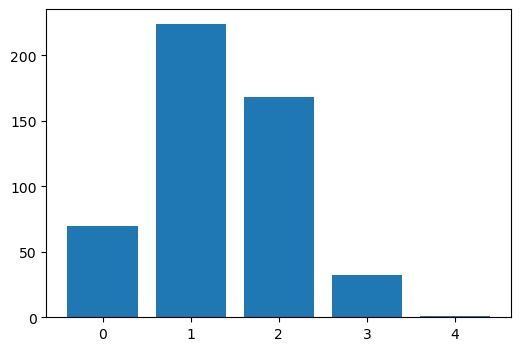

In [18]:
# Plotting.
# https://matplotlib.org/stable/contents.html
import matplotlib.pyplot as plt

# Create a figure.
fig, ax = plt.subplots(figsize=(6, 4))

# Bar chart.
ax.bar(counts[0], counts[1])

# Show.
plt.show()

### The Null Hypothesis

Selection of four cups of milk first and eight cups of tea first from the twelve cups at random.

In [19]:
# The probability to get right answer.
1 / 495

0.00202020202020202

In [20]:
# The probability that randomly selecting at least three correct cups with milk first.
(32 + 1) / 495

0.06666666666666667

In [21]:
# The probability that randomly selecting at least one correct cup with milk first.
(224 + 168 + 32 + 1) / 495

0.8585858585858586

In [22]:
# The probability that randomly selecting no correct cup with milk first.
70/495

0.1414141414141414

---
## End